In [50]:
import matplotlib.pyplot as plt
import numpy as np
import tensorly as tl
import pickle

from tensorly.cp_tensor import cp_to_tensor
from tensorly.random import random_cp

## Varying T
In this set of plots, we vary $T$, the number of tasks, from $T = 100$ to $T = 1500$. The other parameters are all kept the same:
 - $d_1 = 100$
 - $d_2 = 50$
 - $d_3 = 10$
 - $N = 2500$
 - $r = 10$
 - $\sigma = 0.1$
 
We plot this against the value:

$$\frac{\|\hat{A} - A\|}{\|A\|}$$

In [51]:
# Load up all the estimated data from T = 100, 200, ... 1500
PATH_PREFIX = "result_data/"
est_A_arr = []
true_A_arr = []
T_arr = [(i + 1) * 100 for i in range(15)]

# Load the estimated data
for T in T_arr:
    est_A = pickle.load(open(PATH_PREFIX + "T_{}/A_hat_T{}.pkl".format(T, T), "rb"))
    est_A_arr.append(est_A)

# Load the true data
for T in T_arr:
    true_A = pickle.load(open(PATH_PREFIX + "T_{}/A_T{}.pkl".format(T, T), "rb"))
    true_A_arr.append(true_A)

In [52]:
# Compare to a random A to see if progress was made
r = 10

dist_rand_A_arr = []
for i in range(15):
    (_, factors) = random_cp((true_A_arr[i].shape[0], true_A_arr[i].shape[1], true_A_arr[i].shape[2]), 
                             full=False, rank=r, orthogonal=True, normalise_factors=True)
    weights = np.random.uniform(low=1.0, high=10.0, size=(r))
    random_A = cp_to_tensor((weights, factors)) 
    dist_rand_A = tl.norm(random_A - true_A_arr[i])/tl.norm(true_A_arr[i])
    dist_rand_A_arr.append(dist_rand_A)

In [58]:
# Get the distances from true A to the estimated A
dist_est_A_arr = []
for i in range(15):
    (_, factors) = random_cp((est_A_arr[i].shape[0], est_A_arr[i].shape[1], est_A_arr[i].shape[2]), 
                             full=False, rank=r, orthogonal=True, normalise_factors=True)
    weights = np.random.uniform(low=1.0, high=10.0, size=(r))
    random_A = cp_to_tensor((weights, factors)) 
    dist_est_A = tl.norm(true_A_arr[i] - est_A_arr[i])/tl.norm(true_A_arr[i])
    dist_est_A_arr.append(dist_est_A)

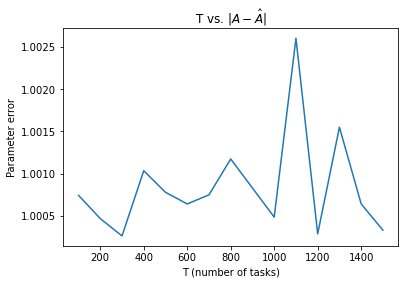

In [72]:
# Plot the results
# Plot #1: T vs. ||A - \hat{A}||/||A||
plt.plot(T_arr, dist_est_A_arr)
plt.title("T vs. $\|A - \hat{A}\|$")
plt.xlabel("T (number of tasks)")
plt.ylabel("Parameter error")
plt.show()

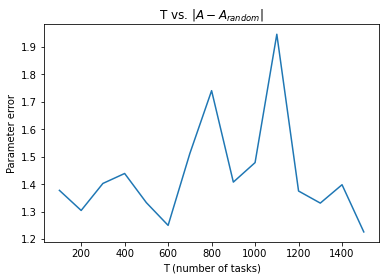

In [73]:
# Plot #2: T vs. ||A - random_A||/||A||
plt.plot(T_arr, dist_rand_A_arr)
plt.title("T vs. $\|A - A_{random}\|$")
plt.xlabel("T (number of tasks)")
plt.ylabel("Parameter error")
plt.show()

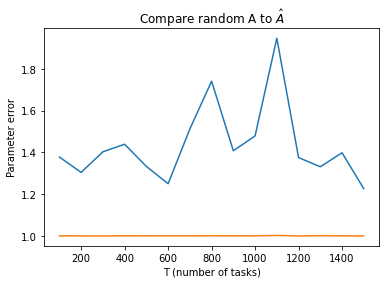

In [74]:
# Plot #3: Plot both side by side
plt.plot(T_arr, dist_rand_A_arr)
plt.plot(T_arr, dist_est_A_arr)
plt.title("Compare random A to $\hat{A}$")
plt.xlabel("T (number of tasks)")
plt.ylabel("Parameter error")
plt.show()